Data Reading and Cleaning

In [1]:
#region Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, MinMaxScaler, PolynomialFeatures
from category_encoders import TargetEncoder
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Pipeline
from sklearn.pipeline import Pipeline, make_pipeline

# Saving models
import joblib

#endregion

#region Reading Data and it's details
df = pd.read_csv('../Preprocessed_data/Preprocessed_data.csv')
#print(df.head())


#print("Summary Statistics:\n" + "-" * 50 + "\n", df.describe(), "\n")
print("Missing Values in Each Column:\n" + "-" * 50 + "\n", df.isnull().sum(), "\n")
#print("Data Types of Each Column:\n" + "-" * 50 + "\n", df.dtypes, "\n")
print("Shape of the Dataframe:\n" + "-" * 50 + "\n", df.shape, "\n")
#endregion

#region Proprocessing data : 

#'P1_SWr', 'P2_SWr','P1_Wr', 'P2_Wr','P1_Avg', 'P2_Avg',

df.dropna(subset=['P1_Rank', 'P2_Rank', 'P1_ATPts', 'P2_ATPts', 'P1_Avg_Odds', 'P2_Avg_Odds'], inplace=True)

df = df[['DIFF_Rank', 'DIFF_ATPts', 'DIFF_Avg', 'DIFF_Wr', 'P1P2_H2H', 'DIFF_SWr', 'P1_Avg_Odds', 'P2_Avg_Odds', 'Winner']]

features_with_missing = ['DIFF_Avg', 'DIFF_ATPts', 'DIFF_Wr', 'DIFF_SWr', 'P1P2_H2H']

for feature in features_with_missing:
    
    if feature in ['P1P2_H2H']:
        df[feature].fillna(0.5, inplace=True)  
    else:
        df[feature].fillna(0, inplace=True)  

print("Missing Values in Each Column:\n" + "-" * 50 + "\n", df.isnull().sum(), "\n")

#endregion

#region X and y Split and Scaling

#X = df[['DIFF_Rank', 'DIFF_Avg', 'DIFF_Wr', 'P1P2_H2H', 'DIFF_SWr']]  
X = df[['DIFF_Rank', 'DIFF_ATPts', 'DIFF_Avg', 'DIFF_Wr', 'P1P2_H2H', 'DIFF_SWr']]  
y = df['Winner']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_val = scaler.transform(X_val)         

#endregion


Missing Values in Each Column:
--------------------------------------------------
 Date                  0
P1                    0
P2                    0
P1_Rank               2
P2_Rank               2
DIFF_Rank             4
P1_ATPts              2
P2_ATPts              2
DIFF_ATPts            4
P1_Avg               33
P2_Avg               32
DIFF_Avg             64
Data_Points_Avg       0
P1_Wr               130
P2_Wr               105
DIFF_Wr             227
P1P2_H2H           2042
Data_Points_H2H       0
P1_SWr              106
P2_SWr              100
DIFF_SWr            201
Surface               0
Data_Points_SWr       0
Winner                0
P1_Avg_Odds           8
P2_Avg_Odds           8
dtype: int64 

Shape of the Dataframe:
--------------------------------------------------
 (3601, 26) 

Missing Values in Each Column:
--------------------------------------------------
 DIFF_Rank      0
DIFF_ATPts     0
DIFF_Avg       0
DIFF_Wr        0
P1P2_H2H       0
DIFF_SWr       0
P1_A

C:\Users\amine\AppData\Local\Temp\ipykernel_31912\3968595077.py:58: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[feature].fillna(0, inplace=True)
C:\Users\amine\AppData\Local\Temp\ipykernel_31912\3968595077.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

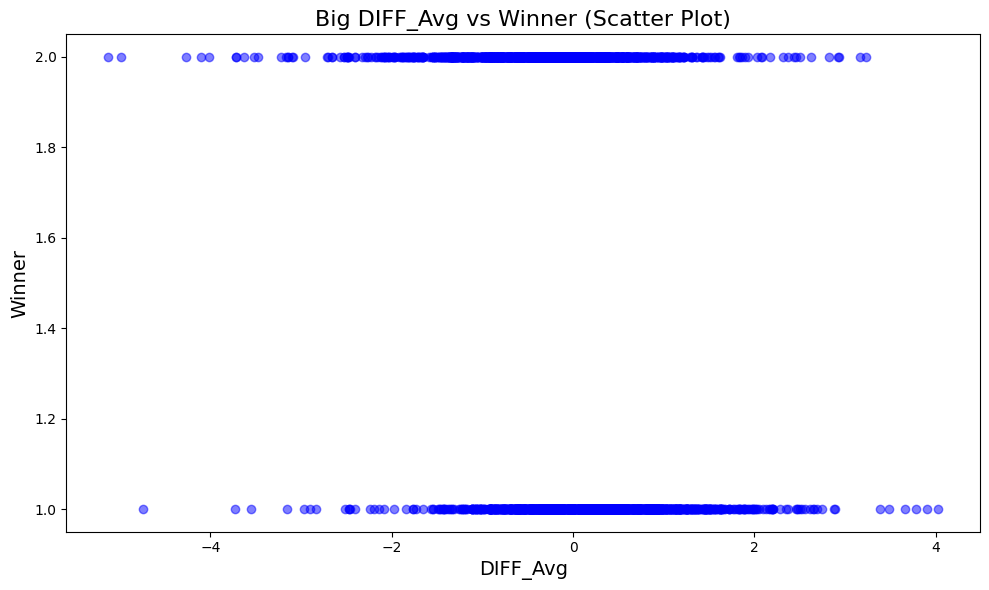

In [2]:

# Filter the DataFrame for big DIFF_Avg values (absolute value > 10)
big_diff_avg_df = df
# Increase the figure size
plt.figure(figsize=(10, 6))

# Scatter plot for big DIFF_Avg vs Winner
plt.scatter(big_diff_avg_df['DIFF_Avg'], big_diff_avg_df['Winner'], c='blue', alpha=0.5)
plt.title('Big DIFF_Avg vs Winner (Scatter Plot)', fontsize=16)
plt.xlabel('DIFF_Avg', fontsize=14)
plt.ylabel('Winner', fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [3]:
#region model Selection

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=1, max_iter=1000, C=1000)
log_reg_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = log_reg_model.predict(X_val)
y_pred_prob = log_reg_model.predict_proba(X_val)[:, 1]  # Probability of Player 2 winning
y_pred_prob_p1 = log_reg_model.predict_proba(X_val)[:, 0]  # Probability of Player 1 winning

#endregion


#region model evaluation

accuracy = accuracy_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_prob)

print(f"Final Accuracy: {accuracy:.2f}")
print(f"Final ROC-AUC Score: {roc_auc:.2f}")
print("\nClassification Report:\n", classification_report(y_val, y_pred))

#endregion




Final Accuracy: 0.64
Final ROC-AUC Score: 0.72

Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.69      0.65       340
           2       0.68      0.60      0.64       378

    accuracy                           0.64       718
   macro avg       0.65      0.65      0.64       718
weighted avg       0.65      0.64      0.64       718



In [4]:
# Adjust to retain indices
X_train_df, X_val_df, y_train_df, y_val_df = train_test_split(
    df, df['Winner'].map({1: 0, 2: 1}), test_size=0.2, random_state=42
)

# Extract P1_Avg_Odds from the validation DataFrame
p1_avg_odds = X_val_df['P1_Avg_Odds'].values

# Calculate inverse probabilities for Player 1
inverse_predicted_prob = 1 / y_pred_prob_p1

# Calculate absolute differences
absolute_differences = abs(inverse_predicted_prob - p1_avg_odds)

# Calculate mean absolute difference (MAD)
mean_absolute_difference = absolute_differences.mean()

print(f"\nMean Absolute Difference between inverse predicted probabilities and P1_Avg_Odds: {mean_absolute_difference:.4f}")

# Optional: Print a few examples for verification
comparison_df = pd.DataFrame({
    'Inverse_Predicted_Prob': inverse_predicted_prob,
    'P1_Avg_Odds': p1_avg_odds,
    'Abs_Difference': absolute_differences
})
print("\nSample Comparison:\n", comparison_df.head(50))



Mean Absolute Difference between inverse predicted probabilities and P1_Avg_Odds: 0.6507

Sample Comparison:
     Inverse_Predicted_Prob  P1_Avg_Odds  Abs_Difference
0                 1.409022         1.10        0.309022
1                 2.117966         3.74        1.622034
2                 1.047952         1.09        0.042048
3                 1.936432         2.38        0.443568
4                 3.626786         4.79        1.163214
5                10.915678         6.33        4.585678
6                 1.887510         2.17        0.282490
7                 1.904458         1.47        0.434458
8                 1.519063         1.16        0.359063
9                 2.188564         2.44        0.251436
10                2.108319         2.30        0.191681
11                1.164278         1.20        0.035722
12                1.752997         1.51        0.242997
13                1.873741         2.20        0.326259
14                1.782139         2.55        0.

In [5]:
import joblib

# Save the model
joblib.dump(log_reg_model, "log_reg_model.pkl")


['log_reg_model.pkl']